# Introduction

I have structured the analysis in the following manner:

- Importing the libraries
- Loading the data
- Check for missing values
- Feature Engineering
- Understanding the data using descriptive statistics and data visualization
- Feature categorization
- Principal Component Analysis
- Clustering data
- Results
- Conclusions

# Import libraries for ingesting and visualizing the data. Implement settings for displaying values

In [72]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_rows = None # set maximum rows that can be displayed in notebook.
pd.options.display.max_columns = None # set maximum columns that can be displayed in notebook.
pd.options.display.precision = 2 # set the precision of floating point numbers.

# Loading the data

In [73]:
data = pd.read_csv("../data/candy-data.csv")
data.dataframeName = 'candy-data.csv'
nRow, nCol = data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 85 rows and 13 columns


# Checking for missing values

In [74]:
(data.isnull().sum()/len(data)*100).sort_values(ascending=False)

winpercent          0.0
pricepercent        0.0
sugarpercent        0.0
pluribus            0.0
bar                 0.0
hard                0.0
crispedricewafer    0.0
nougat              0.0
peanutyalmondy      0.0
caramel             0.0
fruity              0.0
chocolate           0.0
competitorname      0.0
dtype: float64

The data appears to have no missing values

# Feature Engineering

### Generating additional data-points to help us undestand the cause-and-effect better

In [75]:
data['winpercent'] = data['winpercent']/100
data['sugarbyprice'] = data['sugarpercent'].div(data['pricepercent']) # higher value means the candy is sweet as well as cheap.
data['winbyprice'] = data['winpercent'].div(data['pricepercent']) # higher value means the candy is more liked as well as cheap.

# Understanding the data using some descriptive statistics and visualization

In [76]:
data.head()

competitorname  chocolate  fruity  caramel  peanutyalmondy  nougat  \
0      100 Grand          1       0        1               0       0   
1   3 Musketeers          1       0        0               0       1   
2       One dime          0       0        0               0       0   
3    One quarter          0       0        0               0       0   
4      Air Heads          0       1        0               0       0   

   crispedricewafer  hard  bar  pluribus  sugarpercent  pricepercent  \
0                 1     0    1         0          0.73          0.86   
1                 0     0    1         0          0.60          0.51   
2                 0     0    0         0          0.01          0.12   
3                 0     0    0         0          0.01          0.51   
4                 0     0    0         0          0.91          0.51   

   winpercent  sugarbyprice  winbyprice  
0        0.67          0.85        0.78  
1        0.68          1.18        1.32  
2        0.32          0.09        2.78  
3        0.46          0.02        0.90  
4        0.52          1.77        1.02

In [77]:
data.describe()

chocolate  fruity  caramel  peanutyalmondy  nougat  crispedricewafer  \
count      85.00   85.00    85.00           85.00   85.00             85.00   
mean        0.44    0.45     0.16            0.16    0.08              0.08   
std         0.50    0.50     0.37            0.37    0.28              0.28   
min         0.00    0.00     0.00            0.00    0.00              0.00   
25%         0.00    0.00     0.00            0.00    0.00              0.00   
50%         0.00    0.00     0.00            0.00    0.00              0.00   
75%         1.00    1.00     0.00            0.00    0.00              0.00   
max         1.00    1.00     1.00            1.00    1.00              1.00   

        hard    bar  pluribus  sugarpercent  pricepercent  winpercent  \
count  85.00  85.00     85.00         85.00         85.00       85.00   
mean    0.18   0.25      0.52          0.48          0.47        0.50   
std     0.38   0.43      0.50          0.28          0.29        0.15   
min     0.00   0.00      0.00          0.01          0.01        0.22   
25%     0.00   0.00      0.00          0.22          0.26        0.39   
50%     0.00   0.00      1.00          0.47          0.47        0.48   
75%     0.00   0.00      1.00          0.73          0.65        0.60   
max     1.00   1.00      1.00          0.99          0.98        0.84   

       sugarbyprice  winbyprice  
count         85.00       85.00  
mean           1.88        2.50  
std            3.15        5.01  
min            0.02        0.23  
25%            0.61        0.76  
50%            1.00        1.12  
75%            1.77        2.35  
max           21.53       41.58

## Let's see it viusally

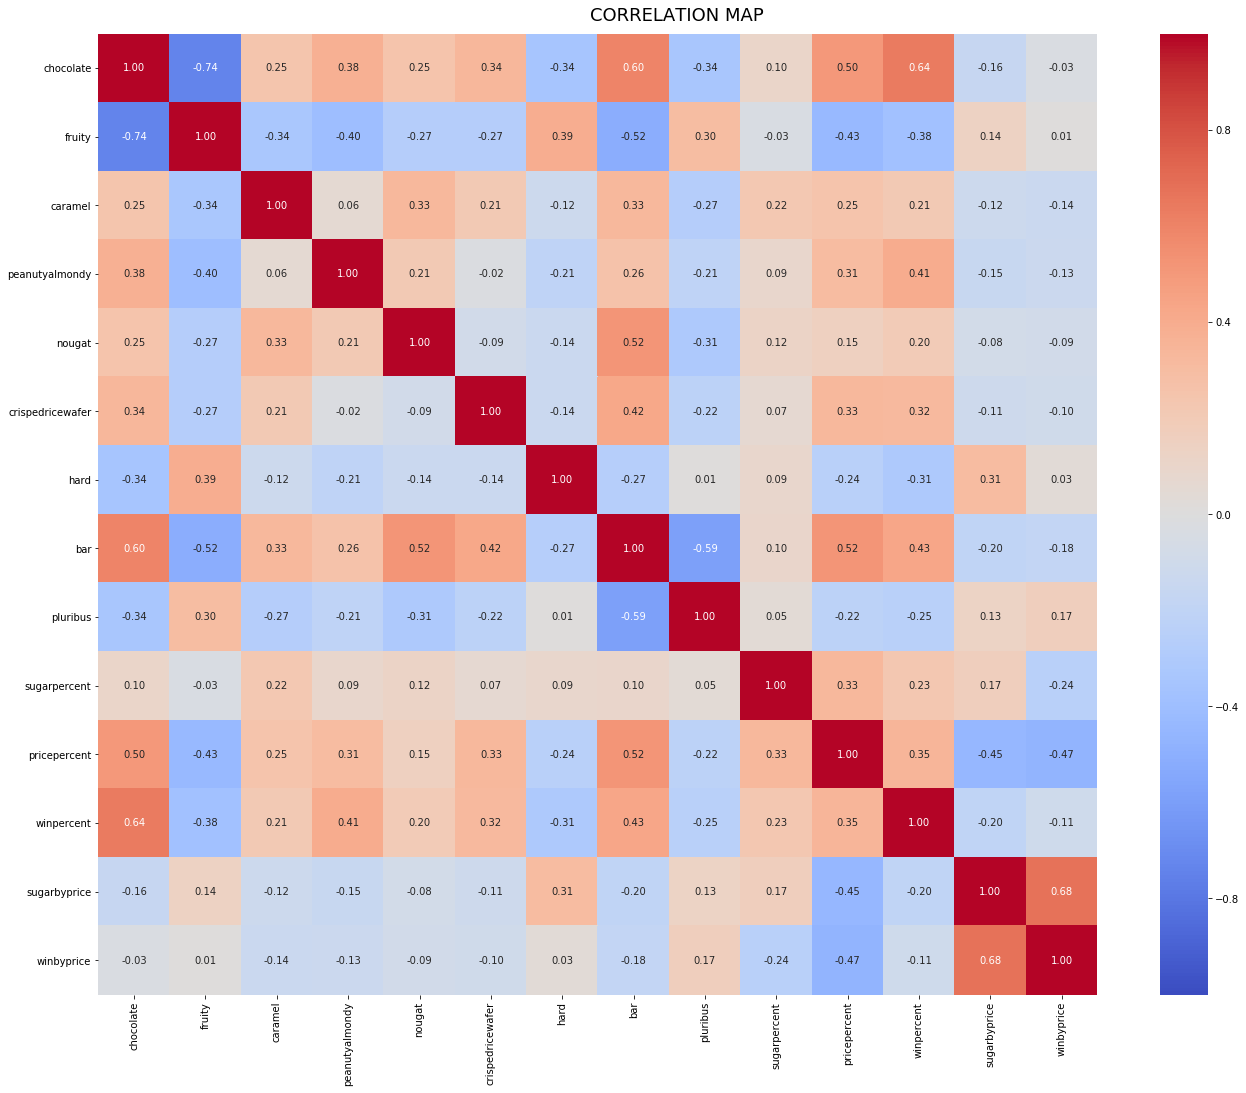

In [78]:
plt.figure(figsize=(20,16))
plt.suptitle("CORRELATION MAP", fontsize=18)
sns.heatmap(data.corr(), annot=True, fmt="0.2f", cmap="coolwarm", vmin=-1.0, vmax=1.0)
plt.tight_layout(pad=5.0)
plt.show()

HeatMap above shows:

* Makers do not mix chocolate and fruits most of the time
* Candies wihch are shaped as bar generally has chocolate and/or nougat and they are least likely to be in a bag and have fruits
* Chocolate means win (mostly)
* Sugar doesn't have a considerable effect on winning

# Let's explore the possible ingredients

## Chocolate

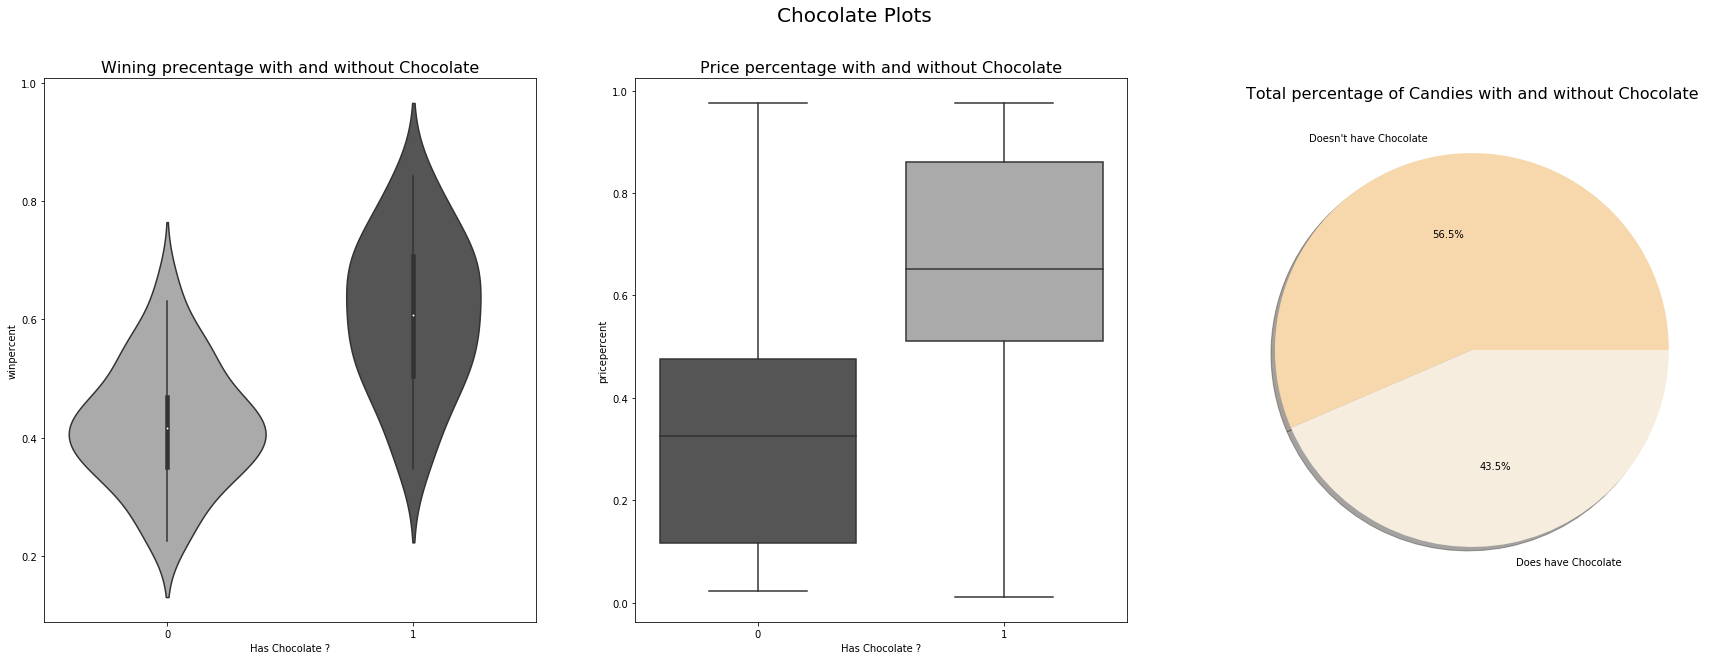

In [79]:
plt.figure(figsize=(30,10))

plt.suptitle("Chocolate Plots", fontsize=20)

plt.subplot(1,3,1)
plt.title("Wining precentage with and without Chocolate",fontsize=16)
sns.violinplot(data=data,x="chocolate",y="winpercent",color="brown",palette="gray_r")
plt.xlabel("Has Chocolate ?")

plt.subplot(1,3,3)
plt.title("Total percentage of Candies with and without Chocolate",fontsize=16)
plt.pie(data.chocolate.value_counts(), autopct='%1.1f%%',colors=["#F7D8AD","#F7EDDF"],labels=["Doesn't have Chocolate","Does have Chocolate"],shadow=True)

plt.subplot(1,3,2)
plt.title("Price percentage with and without Chocolate",fontsize=16)
sns.boxplot(y="pricepercent", x="chocolate", data=data, palette="gray")
plt.xlabel("Has Chocolate ?")

plt.show()

Observations from graphs above:

* Chocolate is the key for win (nothing without chocolate has more than 80 as a winning score)
* Chocolate is generally pricey
* Almost half of all candies has chocolate

## Caramel

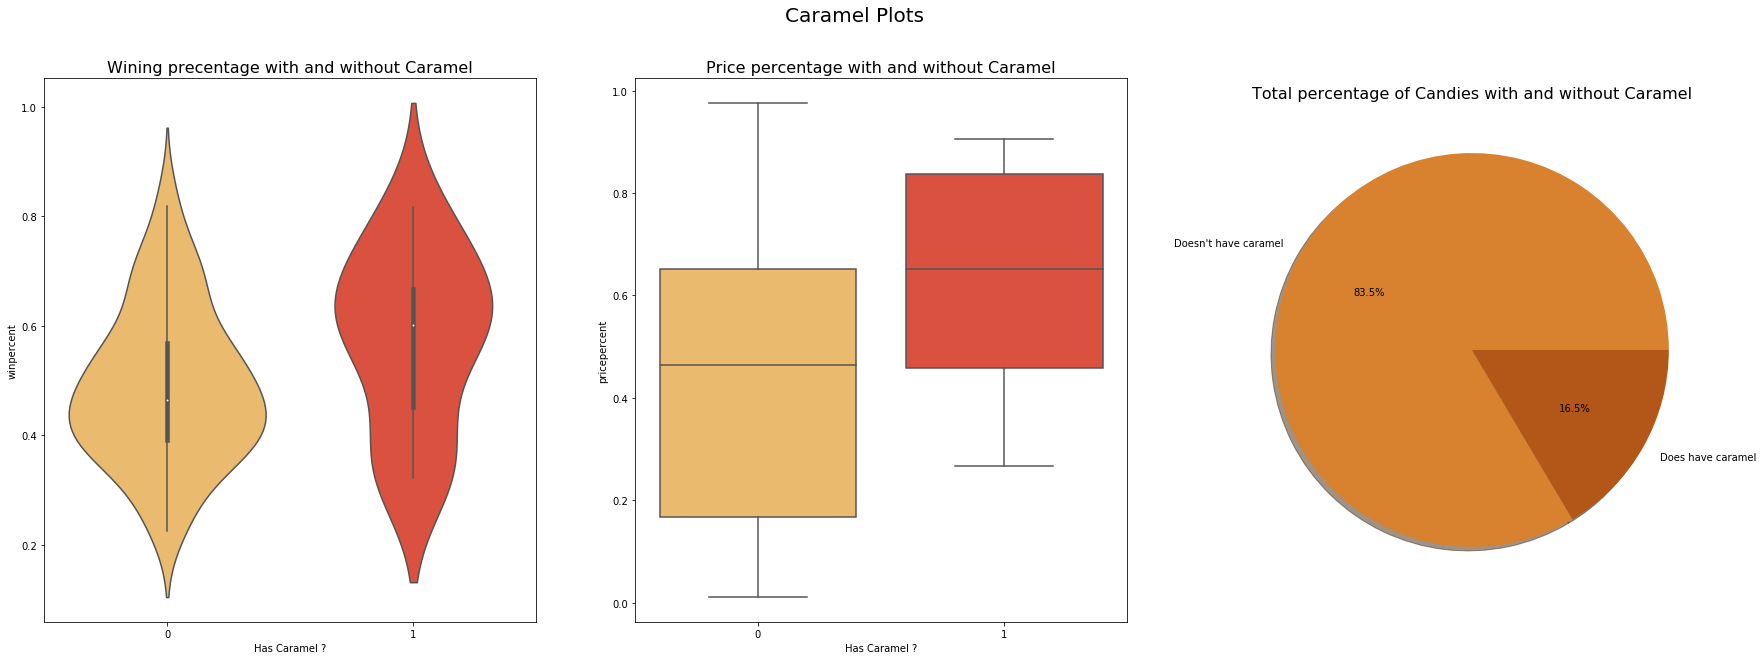

In [80]:
plt.figure(figsize=(30,10))

plt.suptitle("Caramel Plots", fontsize=20)

plt.subplot(1,3,1)
plt.title("Wining precentage with and without Caramel",fontsize=16)
sns.violinplot(data=data,x="caramel",y="winpercent",color="brown",palette="YlOrRd")
plt.xlabel("Has Caramel ?")

plt.subplot(1,3,3)
plt.title("Total percentage of Candies with and without Caramel",fontsize=16)
plt.pie(data.caramel.value_counts(), autopct='%1.1f%%',colors=["#D8822F","#B35719"],labels=["Doesn't have caramel","Does have caramel"],shadow=True)

plt.subplot(1,3,2)
plt.title("Price percentage with and without Caramel",fontsize=16)
sns.boxplot(y="pricepercent", x="caramel", data=data, palette="YlOrRd")
plt.xlabel("Has Caramel ?")

plt.show()

Observations:

* You don't really need to have caramel but it does have a slight effect on winning
* It's not super costly but since it is generally used with multiple ingredients it has higher price (look at the heatmap)
* It's not very common to use caramel (only 16.5% uses it)

## Fruit

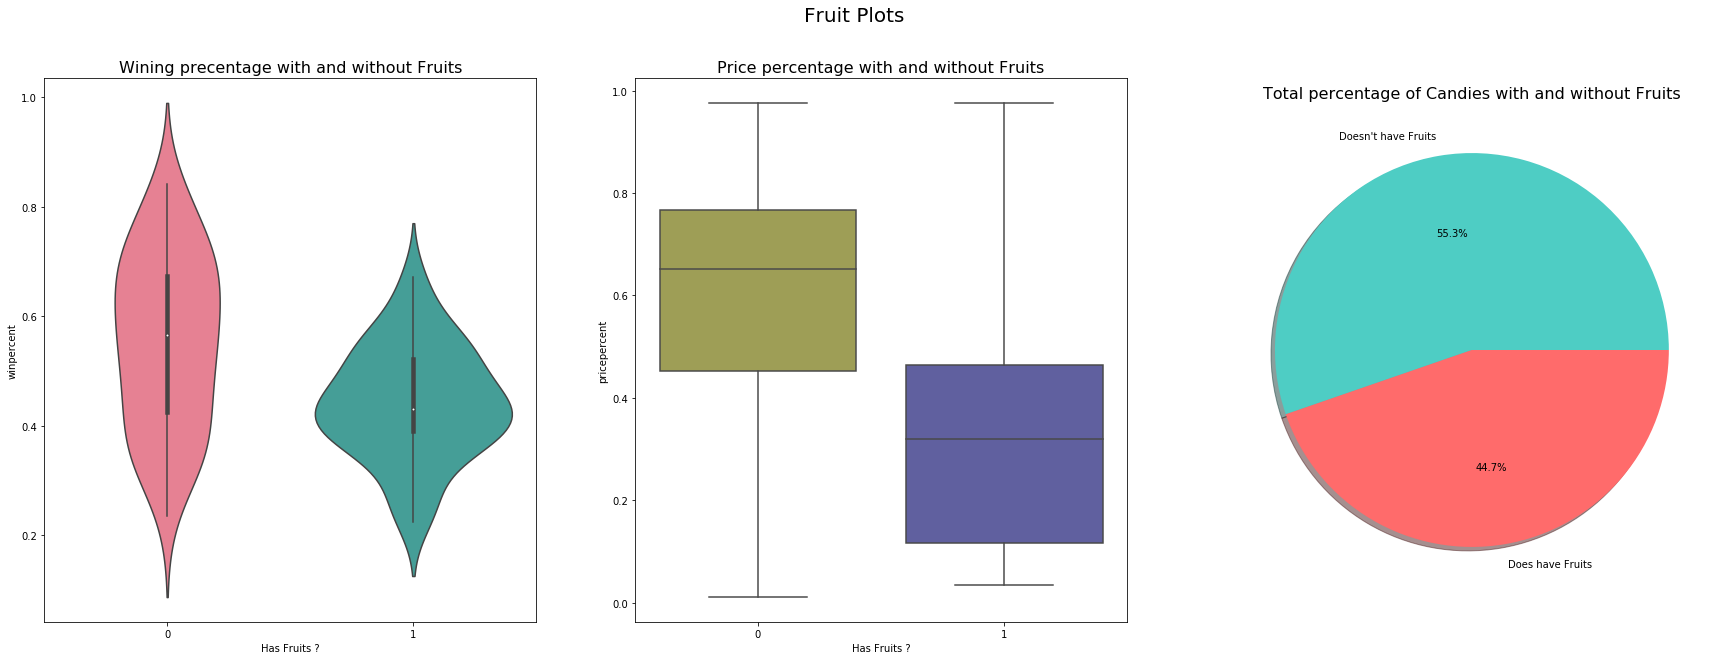

In [81]:
plt.figure(figsize=(30,10))

plt.suptitle("Fruit Plots", fontsize=20)

plt.subplot(1,3,1)
plt.title("Wining precentage with and without Fruits",fontsize=16)
sns.violinplot(data=data,x="fruity",y="winpercent",color="brown",palette="husl")
plt.xlabel("Has Fruits ?")

plt.subplot(1,3,3)
plt.title("Total percentage of Candies with and without Fruits",fontsize=16)
plt.pie(data.fruity.value_counts(), autopct='%1.1f%%',colors=["#4ECDC4","#FF6B6B"],labels=["Doesn't have Fruits","Does have Fruits"],shadow=True)

plt.subplot(1,3,2)
plt.title("Price percentage with and without Fruits",fontsize=16)
sns.boxplot(y="pricepercent", x="fruity", data=data, palette="gist_stern_r")
plt.xlabel("Has Fruits ?")

plt.show()

Observations:

* Fruits are not good for winning. Best score from fruity candy is close to 80, and mean score around 40s.
* It's dramatically cheaper than other ingredients
* It's very common to use Fruits.

## Peanut

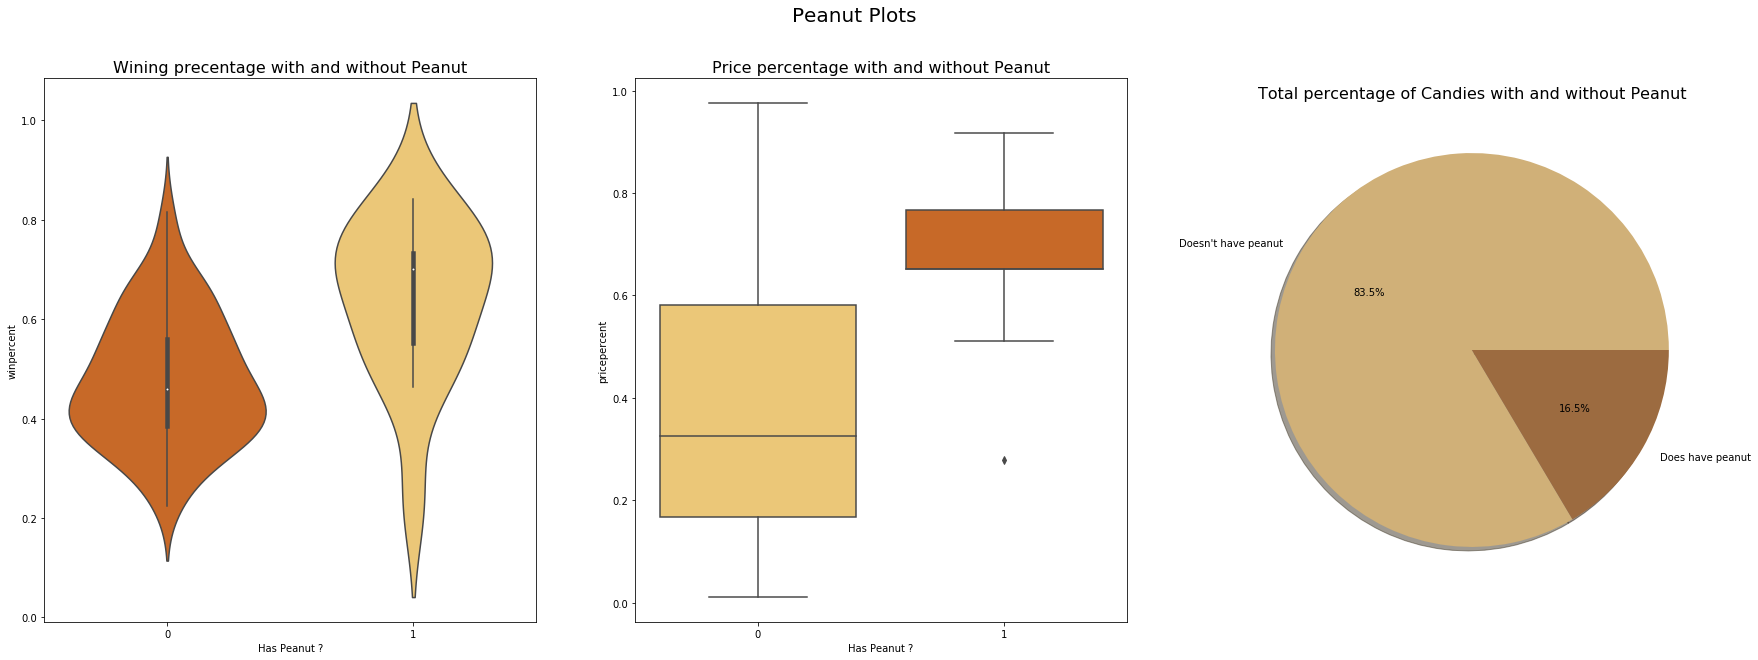

In [82]:
plt.figure(figsize=(30,10))

plt.suptitle("Peanut Plots", fontsize=20)

plt.subplot(1,3,1)
plt.title("Wining precentage with and without Peanut",fontsize=16)
sns.violinplot(data=data,x="peanutyalmondy",y="winpercent",palette="YlOrBr_r")
plt.xlabel("Has Peanut ?")

plt.subplot(1,3,3)
plt.title("Total percentage of Candies with and without Peanut",fontsize=16)
plt.pie(data.peanutyalmondy.value_counts(), autopct='%1.1f%%',colors=["#D0B078","#9C6B40"],labels=["Doesn't have peanut","Does have peanut"],shadow=True)

plt.subplot(1,3,2)
plt.title("Price percentage with and without Peanut",fontsize=16)
sns.boxplot(y="pricepercent", x="peanutyalmondy", data=data, palette="YlOrBr")
plt.xlabel("Has Peanut ?")

plt.show()

Observations:

* Peanut is also key of winning (like chocolate)
* Also expensive (like chocolate)
* But confusingly Not very common (like caramel??)

I guess it's because of Peanuts or Almonds are not very popular on the market

## Nougat

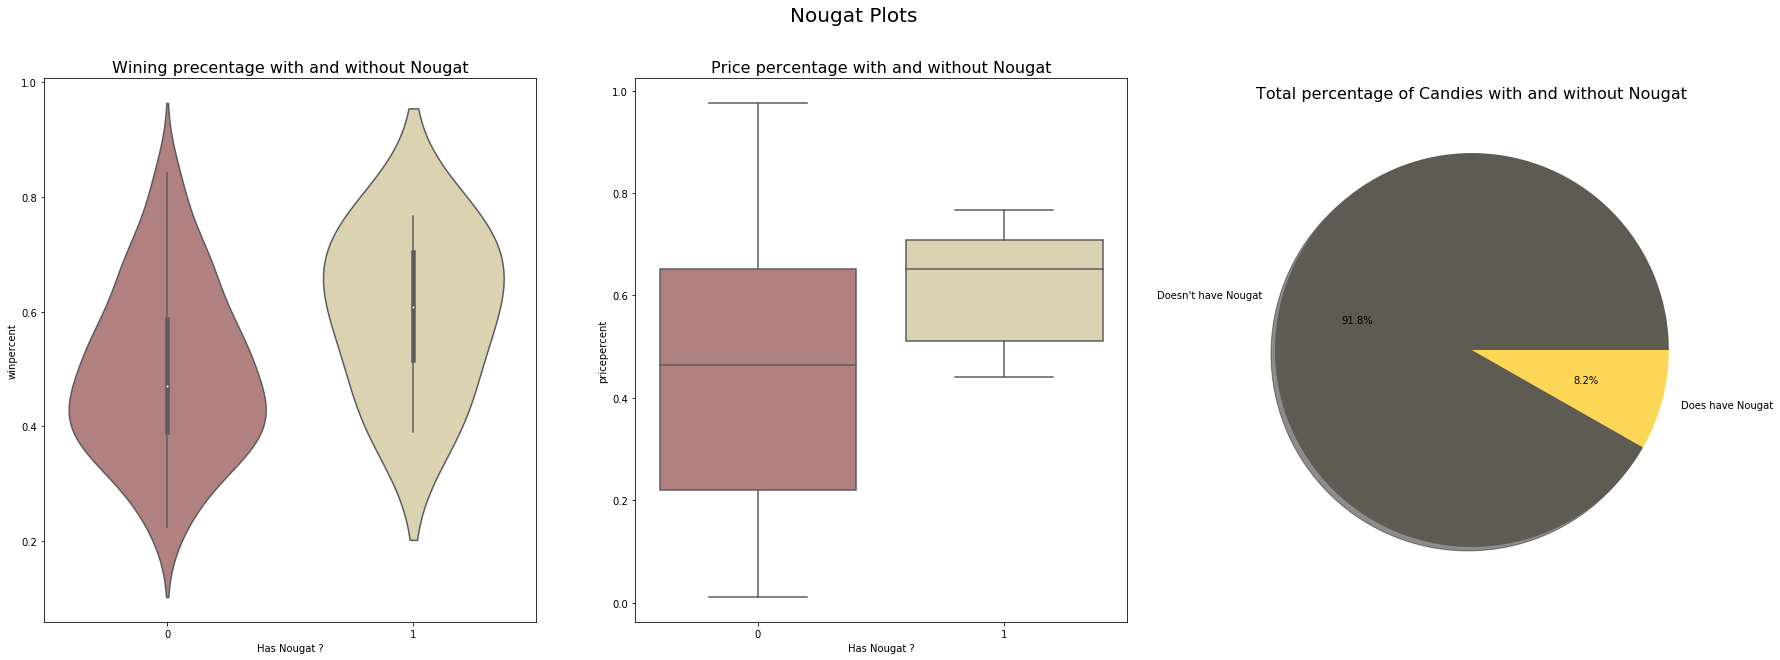

In [83]:
plt.figure(figsize=(30,10))

plt.suptitle("Nougat Plots", fontsize=20)

plt.subplot(1,3,1)
plt.title("Wining precentage with and without Nougat",fontsize=16)
sns.violinplot(data=data,x="nougat",y="winpercent",palette="pink")
plt.xlabel("Has Nougat ?")

plt.subplot(1,3,3)
plt.title("Total percentage of Candies with and without Nougat",fontsize=16)
plt.pie(data.nougat.value_counts(), autopct='%1.1f%%',colors=["#5e5b52","#fcd757"],labels=["Doesn't have Nougat","Does have Nougat"],shadow=True)

plt.subplot(1,3,2)
plt.title("Price percentage with and without Nougat",fontsize=16)
sns.boxplot(y="pricepercent", x="nougat", data=data, palette="pink")
plt.xlabel("Has Nougat ?")

plt.show()

Observations:

* It has small effect on winning. general scores are between 60 and 80.
* Slightly more expensive than the others
* Not popular in the Candy business too.

## Crisped Rice or Wafer

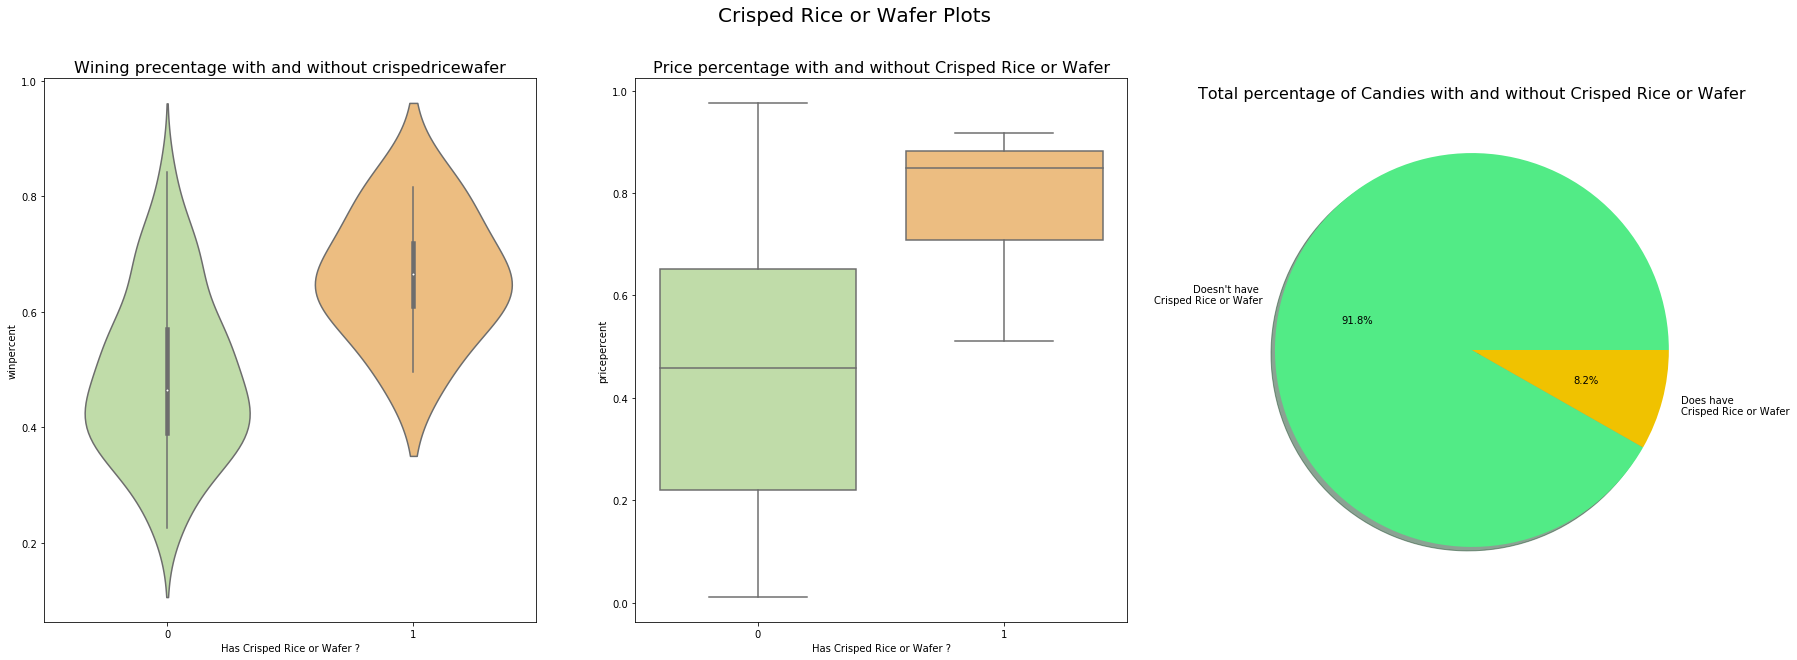

In [84]:
plt.figure(figsize=(30,10))

plt.suptitle("Crisped Rice or Wafer Plots", fontsize=20)

plt.subplot(1,3,1)
plt.title("Wining precentage with and without crispedricewafer",fontsize=16)
sns.violinplot(data=data,x="crispedricewafer",y="winpercent",palette="Spectral_r")
plt.xlabel("Has Crisped Rice or Wafer ?")

plt.subplot(1,3,3)
plt.title("Total percentage of Candies with and without Crisped Rice or Wafer",fontsize=16)
plt.pie(data.crispedricewafer.value_counts(), autopct='%1.1f%%',colors=["#52eb86","#f0c200"],labels=["Doesn't have \nCrisped Rice or Wafer","Does have \nCrisped Rice or Wafer"],shadow=True)

plt.subplot(1,3,2)
plt.title("Price percentage with and without Crisped Rice or Wafer",fontsize=16)
sns.boxplot(y="pricepercent", x="crispedricewafer", data=data, palette="Spectral_r")
plt.xlabel("Has Crisped Rice or Wafer ?")

plt.show()

Observations:

* It has considerably good effect on winning. Minimun score is 40, which is a good sign
* More expensive than the others
* Not popular in the Candy business too.

# Feature categorization

In [85]:
categorival_vars = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar',
                    'pluribus']
numerical_vars = ['sugarpercent', 'pricepercent', 'winpercent', 'sugarbyprice', 'winbyprice']

# Principal Component Analysis

As we have seen in the correlation heatmap (in the beginning of visual data exploration), we do have some correlation between features. We can use PCA for treating correlation as well as dimensionality reduction.

PCA is performed below in 4 steps:

- import
- instantiate
- fit
- transform

In [86]:
from sklearn.decomposition import PCA # import.
pca = PCA(svd_solver='randomized', random_state=123) # instantiate.
pca.fit(data.drop('competitorname', axis=1)) # fit.

PCA(copy=True, iterated_power='auto', n_components=None, random_state=123,
  svd_solver='randomized', tol=0.0, whiten=False)

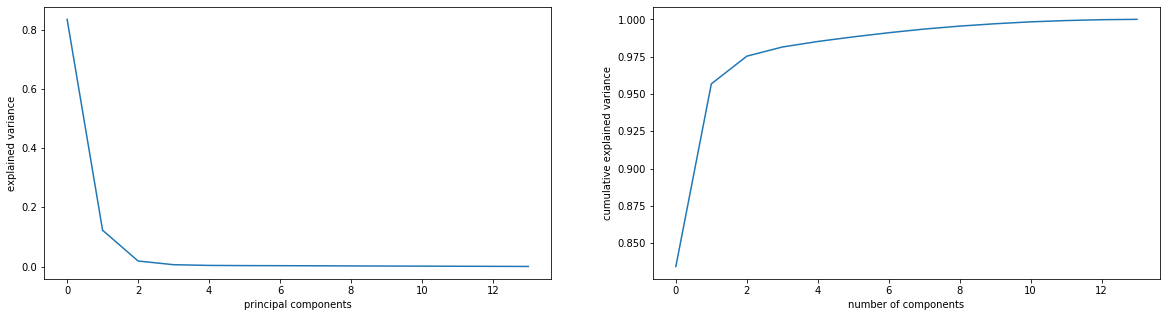

In [87]:
# Making the screeplot - plotting the cumulative variance against the number of components

fig = plt.figure(figsize = (20,5))
ax = plt.subplot(121)
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('principal components')
plt.ylabel('explained variance')

ax2 = plt.subplot(122)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

plt.show()

First 2-3 components are suggested by using the elbow method.

In [88]:
# What percentage of variance in data can be explained by first 2,3 and 4 principal components respectively?

In [89]:
(pca.explained_variance_ratio_[0:2].sum().round(3),
pca.explained_variance_ratio_[0:3].sum().round(3),
pca.explained_variance_ratio_[0:4].sum().round(3))

(0.957, 0.975, 0.981)

# Visualize Principal Components Loadings.


### we'll use first 2 principal components as it retains 95% of variance.

In [90]:
df_pca_2_comp = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':data.drop(
                              'competitorname', axis=1).columns})

### We can visualize what the principal components seem to capture

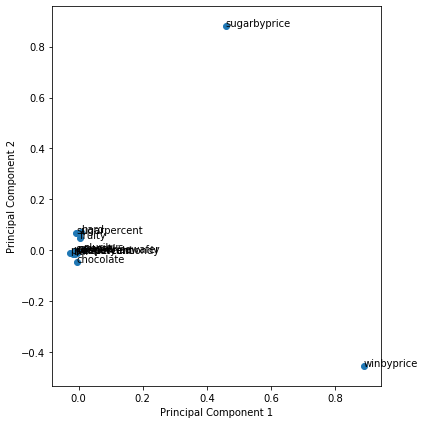

In [91]:
fig = plt.figure(figsize = (6,6))
plt.scatter(df_pca_2_comp.PC1, df_pca_2_comp.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(df_pca_2_comp.Feature):
    plt.annotate(txt, (df_pca_2_comp.PC1[i],df_pca_2_comp.PC2[i]))
plt.tight_layout()
plt.show()

Except sugarbyprice and winbyprice, all the other features seem to be clustered.

## Transforming Data with new features as principal components

In [92]:
df_pca = pca.transform(data.drop('competitorname', axis=1))
df_pca = df_pca[:, 0:2] # Since we require first two principal components only.

## Scaling the above transformed data

In [93]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
df_s = standard_scaler.fit_transform(df_pca) # s in df_s stands for scaled.

## Visualize Principal Components to get some intuiton of data

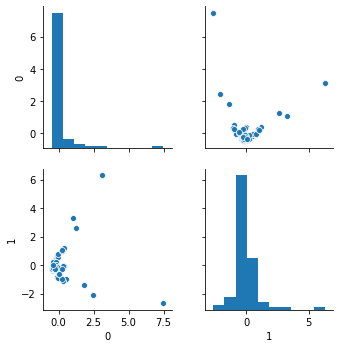

In [94]:
sns.pairplot(pd.DataFrame(df_s))

One cluster is very clearly visible. Seems to me that the second cluster will contain the data points not in the first cluster. Two clusters might suffice.

# Clustering of Data


### Using Hopkin's Statstic to test if the data is clusterable?

Hopkin's Statstic will tell us if the data is clusterable or not. If it is less than 0.5, clusters are not statistically significant.

In [95]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [96]:
hopkins(pd.DataFrame(df_s))

0.9806999236991732

Yes, Hopkin's statistic claims that this data is indeed highly clusterable.

### Using silhouette scores to choose number of clusters

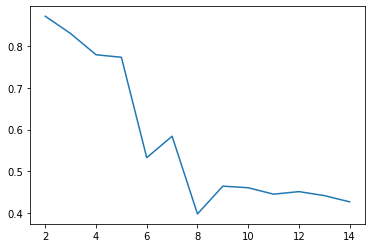

In [97]:
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score
def sil_score(df):
    sse_ = []
    for k in range(2, 15):
        kmeans = KMeans(n_clusters=k, random_state=123).fit(df_s) # fit.
        sse_.append([k, silhouette_score(df, kmeans.labels_)])
    plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])

sil_score(df_s)

Maximum silhouette score at k=2.

### Sum of squared distances

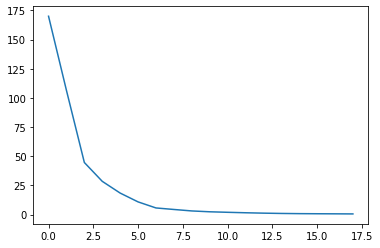

In [98]:
def plot_ssd(df):
    ssd = []
    for num_clusters in list(range(1,19)):
        model_clus = KMeans(n_clusters = num_clusters, max_iter=50, random_state=123)
        model_clus.fit(df)
        ssd.append(model_clus.inertia_)
    plt.plot(ssd)

plot_ssd(df_s)

Elbow seems to form at 2.

### K-Means with 2 clusters

In [99]:
km2c = KMeans(n_clusters=2, max_iter=50, random_state=93)
km2c.fit(df_s)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=93, tol=0.0001, verbose=0)

In [100]:
# creation of data frame with features as principal components for analysis of clusters formed.

df_dummy = pd.DataFrame.copy(pd.DataFrame(df_s))
dfpcakm2c = pd.concat([df_dummy, pd.Series(km2c.labels_)], axis=1)
dfpcakm2c.columns = ['PC1', 'PC2', 'Cluster ID']

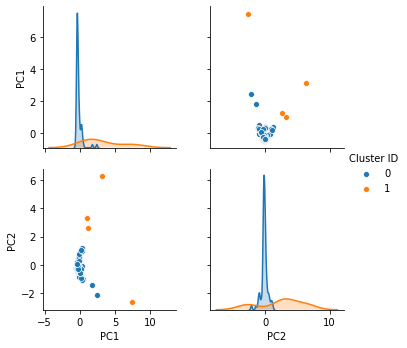

In [101]:
sns.pairplot(data=dfpcakm2c, vars=['PC1', 'PC2'], hue='Cluster ID')

### K-Means with 5 clusters

In [102]:
km5c = KMeans(n_clusters=5, max_iter=50, random_state=123)
km5c.fit(df_s)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

In [103]:
# creation of data frame with original features for analysis of clusters formed.

df_dummy = pd.DataFrame.copy(data)
dfkm5c = pd.concat([df_dummy, pd.Series(km5c.labels_)], axis=1) # df-dataframe, km-kmeans, 5c-5clusters.
dfkm5c.rename(columns={0:'Cluster ID'}, inplace=True)

In [104]:
# creation of data frame with features as principal components for analysis of clusters formed.

df_dummy = pd.DataFrame.copy(pd.DataFrame(df_s))
dfpcakm5c = pd.concat([df_dummy, pd.Series(km5c.labels_)], axis=1)
dfpcakm5c.columns = ['PC1', 'PC2', 'Cluster ID']

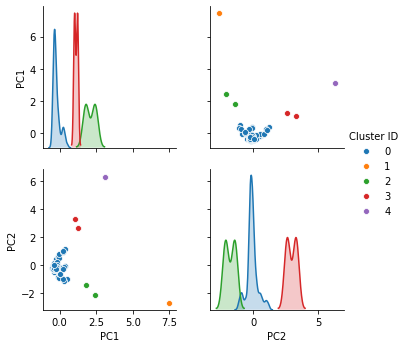

In [105]:
sns.pairplot(data = dfpcakm5c, vars=['PC1', 'PC2'], hue='Cluster ID')

# Analysis of Clusters

### Let's see how cluster 0 differs from the rest.

In [106]:
dfkm5c.groupby('Cluster ID').mean()

chocolate  fruity  caramel  peanutyalmondy  nougat  \
Cluster ID                                                       
0                0.46    0.44     0.18            0.18    0.09   
1                1.00    0.00     0.00            0.00    0.00   
2                0.00    0.50     0.00            0.00    0.00   
3                0.00    0.50     0.00            0.00    0.00   
4                0.00    1.00     0.00            0.00    0.00   

            crispedricewafer  hard   bar  pluribus  sugarpercent  \
Cluster ID                                                         
0                       0.09  0.15  0.27      0.49          0.48   
1                       0.00  0.00  0.00      1.00          0.17   
2                       0.00  0.00  0.00      1.00          0.11   
3                       0.00  1.00  0.00      1.00          0.65   
4                       0.00  1.00  0.00      0.00          0.73   

            pricepercent  winpercent  sugarbyprice  winbyprice  
Cluster ID                                                      
0                   0.50        0.51          1.19        1.52  
1                   0.01        0.46         15.82       41.58  
2                   0.03        0.40          3.89       14.54  
3                   0.06        0.32         10.21        5.13  
4                   0.03        0.39         21.53       11.61

In [107]:
dfkm5c[dfkm5c['Cluster ID']!=0]

competitorname  chocolate  fruity  caramel  peanutyalmondy  nougat  \
14              Dum Dums          0       1        0               0       0   
15           Fruit Chews          0       1        0               0       0   
48          Pixie Sticks          0       0        0               0       0   
57     Root Beer Barrels          0       0        0               0       0   
69   Strawberry bon bons          0       1        0               0       0   
76  Tootsie Roll Midgies          1       0        0               0       0   

    crispedricewafer  hard  bar  pluribus  sugarpercent  pricepercent  \
14                 0     1    0         0          0.73          0.03   
15                 0     0    0         1          0.13          0.03   
48                 0     0    0         1          0.09          0.02   
57                 0     1    0         1          0.73          0.07   
69                 0     1    0         1          0.57          0.06   
76                 0     0    0         1          0.17          0.01   

    winpercent  sugarbyprice  winbyprice  Cluster ID  
14        0.39         21.53       11.61           4  
15        0.43          3.74       12.67           2  
48        0.38          4.04       16.40           2  
57        0.30         10.61        4.30           3  
69        0.35          9.81        5.96           3  
76        0.46         15.82       41.58           1

1. It is to be noted that only Cluster ID 4 (Dum Dums) and 1 (Tootsie Roll Midgies) are far away from Cluster ID 0.
2. 'Dum Dums' and 'Tootsie Roll Midgies' are sort of opposite of each other. The first one is fruity and the second one chocolaty.
3. Cluster ID 0 contains competitors which are mostly chocolaty, sugary and more favourable. Cluster ID 1, although being chocolaty has a low sugar percentile.
4. All the chocolates which don't belong to Cluster ID 0 have made the top 10 list of winbyprice. They are all cheap.
5. Let's put clusters other than 0 into one cluster and then analyze again.

In [108]:
dfkm5c['Cluster ID'] = dfkm5c['Cluster ID'].map(lambda x: 1 if (x!=0) else 0)
dfkm5c.groupby('Cluster ID').mean()

chocolate  fruity  caramel  peanutyalmondy  nougat  \
Cluster ID                                                       
0                0.46    0.44     0.18            0.18    0.09   
1                0.17    0.50     0.00            0.00    0.00   

            crispedricewafer  hard   bar  pluribus  sugarpercent  \
Cluster ID                                                         
0                       0.09  0.15  0.27      0.49          0.48   
1                       0.00  0.50  0.00      0.83          0.40   

            pricepercent  winpercent  sugarbyprice  winbyprice  
Cluster ID                                                      
0                   0.50        0.51          1.19        1.52  
1                   0.04        0.38         10.92       15.42

So, Cluster ID 0 contains competitors which are more chocolaty and more pricey.

# Predicting win percentage

### Scaling

In [109]:
X = data.drop(['competitorname', 'winpercent', 'sugarpercent', 'pricepercent', 'sugarbyprice', 'winbyprice'], axis=1)
y = data['winpercent']

from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()

### Cross-Validation

In [110]:
from sklearn import linear_model
lr_rdg = linear_model.Ridge(random_state=123)

from sklearn.model_selection import GridSearchCV
hyperparameters = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}
model_cv = GridSearchCV(estimator = lr_rdg, param_grid = hyperparameters, cv=10, scoring= 'neg_mean_absolute_error')

model_cv.fit(X, y) # fit.

GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=123, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

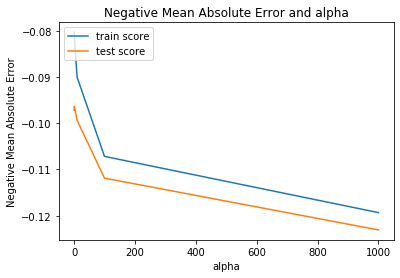

In [111]:
cv_results = pd.DataFrame(model_cv.cv_results_)

# Plotting mean test and train scoes with alpha.
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# Plotting.
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### Ridge Linear Regression

In [112]:
model_cv.best_params_

{'alpha': 1}

In [113]:
alpha = 1
ridge = linear_model.Ridge(alpha=alpha)
ridge.fit(X, y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

# Results

In [114]:
ridge.intercept_ # constant term.

0.3727885990571671

In [115]:
for x,y in zip(X.columns, ridge.coef_): # coefficients of features.
    print(x, y*100)

chocolate 17.395113450849347
fruity 7.72063968640181
caramel 2.9072336870698576
peanutyalmondy 9.09428184646823
nougat 1.376495256219395
crispedricewafer 7.301821467840015
hard -4.44249782763022
bar 0.7309590882068188
pluribus -0.14235867560122606


# Conclusions:

Based on the above results, I would suggest the following for a high win probability:

1. We should have chocolate (or chocolate based) candy
2. Make it crispy with rice wafer for higher popularity
3. We can include peanuts and almonds (or have a variant with these flavours) for better chances of winning
4. We can choose to incorporate Caramel and Nougat as they have a positive impact on the chances of winning